# BT1


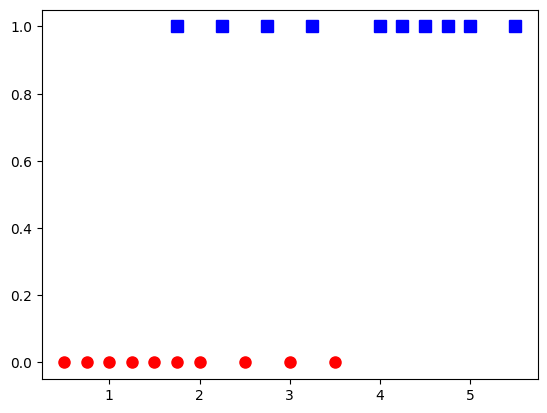

[[-0.43431872]
 [-0.11772989]]
[[0.37914386 0.3722407  0.36538924 0.35859187 0.35185083 0.34516832
  0.34516832 0.33854644 0.33198719 0.32549248 0.31906415 0.31270391
  0.30641341 0.30019418 0.28797522 0.28197808 0.27605741 0.27021427
  0.26444964 0.25315927]]


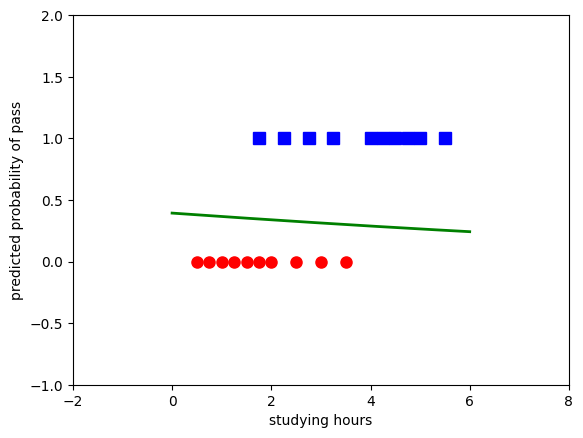

In [9]:
# @title
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()



def sigmoid(s):
  return 1/(1 + np.exp(-s))
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    iteration = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                y_pred_proba = sigmoid(np.dot(w[-1].T, X))
                y_pred_class = (y_pred_proba >= 0.5).astype(int)
                precision = np.sum((y_pred_class == 1) & (y == 1)) / np.sum(y_pred_class == 1)
                print("Precision (selfcode):", precision)
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)

            return w
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
print(sigmoid(np.dot(w[-1].T, X)))




X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()


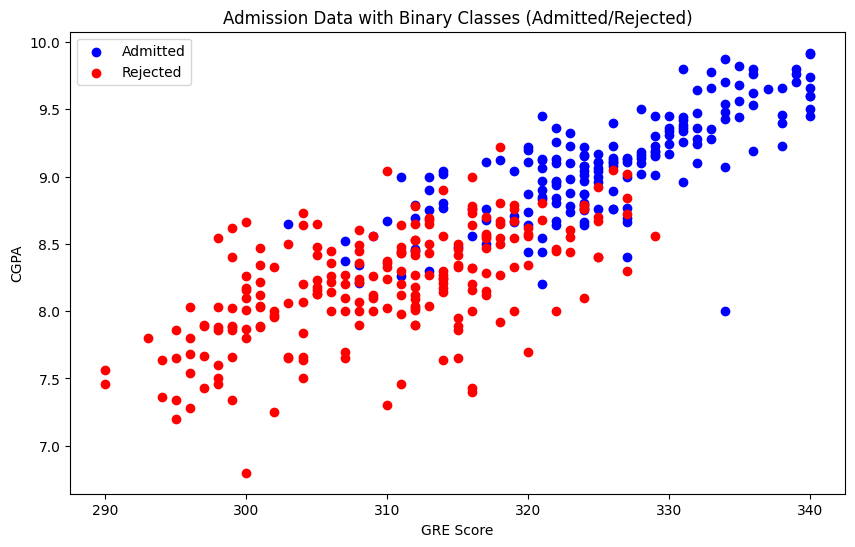

Resulting Parameters (Logistic Regression):
[[ -7.98189643]
 [-73.73889563]
 [215.73623482]
 [143.68081795]
 [108.52839787]
 [ 91.1168915 ]
 [ 48.84730551]
 [ 54.30068378]]

Performance Metrics (Logistic):
Accuracy: 0.56
Precision: 0.5
Recall: 1.0

Resulting Parameters (Linear):
Intercept: -4.462996857211299
Coefficients: [0.00401396 0.00765467 0.05786011 0.03357074 0.03713726 0.26885668
 0.14190028]

Mean Squared Error (Linear): 0.09589505693113339


<ipython-input-10-49dd86138ce3>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


In [10]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

# Load data from the CSV file
file_path = "Admission_Predict.csv"
data = pd.read_csv(file_path)

# Function to calculate the sigmoid of a given input
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

# Function for logistic sigmoid regression
def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000, check_w_after=350):
    w = [w_init]
    count = 0

    while count < max_count:
        mix_id = np.random.permutation(X.shape[1])
        for i in mix_id:
            xi = X[:, i].reshape(-1, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1

            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w

            w.append(w_new)

    return w

# Convert 'Chance of Admit' to binary: 1 if >= 0.75, else 0
data['Admit_Class'] = (data['Chance of Admit '] >= 0.75).astype(int)

# Extracting related columns
X_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
Y_column = 'Admit_Class'

# Choose the first 350 rows as training data, the rest for testing
X_train = data[X_columns][:350].values.T
X_test = data[X_columns][350:].values.T

# Add a column of ones to the left of X to get Xbar
X_train = np.concatenate((np.ones((1, 350)), X_train), axis=0)
X_test = np.concatenate((np.ones((1, 50)), X_test), axis=0)

# Sort data
Y_train = data[Y_column][:350].values
Y_test = data[Y_column][350:].values

# Plot data points
plt.figure(figsize=(10, 6))

admitted = data[data['Admit_Class'] == 1]
rejected = data[data['Admit_Class'] == 0]

plt.scatter(admitted['GRE Score'], admitted['CGPA'], color='blue', label='Admitted')
plt.scatter(rejected['GRE Score'], rejected['CGPA'], color='red', label='Rejected')

plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Admission Data with Binary Classes (Admitted/Rejected)')
plt.legend()
plt.show()


eta = 0.05
d = X_train.shape[0]
w_init = np.random.randn(d, 1)
w_logistic = logistic_sigmoid_regression(X_train, Y_train, w_init, eta, tol=1e-4, max_count=10000)

# Print
print("Resulting Parameters (Logistic Regression):")
print(w_logistic[-1])

# Predict
Y_pred_logistic = sigmoid(np.dot(w_logistic[-1].T, X_test))

# Classify predictions based on threshold 0.5
Y_pred_class_logistic = (Y_pred_logistic >= 0.5).astype(int).flatten()

#accuracy, precision, and recall
accuracy_logistic = accuracy_score(Y_test, Y_pred_class_logistic)
precision_logistic = precision_score(Y_test, Y_pred_class_logistic)
recall_logistic = recall_score(Y_test, Y_pred_class_logistic)

print("\nPerformance Metrics (Logistic):")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)

# Create a linear regression model
linear_reg_model = LinearRegression()

# Fit the model using the training data
linear_reg_model.fit(X_train[1:].T, Y_train)

# Make predictions on the test set
Y_pred_linear_reg = linear_reg_model.predict(X_test[1:].T)

# Calculate the mean squared error for linear regression
mse_linear_reg = mean_squared_error(Y_test, Y_pred_linear_reg)

# Print
print("\nResulting Parameters (Linear):")
print("Intercept:", linear_reg_model.intercept_)
print("Coefficients:", linear_reg_model.coef_)

# Print MSE
print("\nMean Squared Error (Linear):", mse_linear_reg)


Intercept: -3.139524107073134
Coefficient: 1.1486038646145325
Precision (Scikit): 0.8


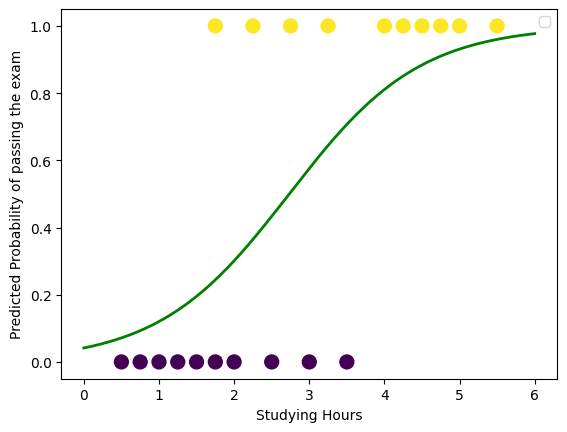

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Sample data
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Reshape X to a 2D array
X = X.reshape(-1, 1)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=2)
model.fit(X, y)

# Print the learned weights (coefficients)
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

# Predict probabilities for the sample data
y_pred_proba = model.predict_proba(X)[:, 1]

# Classify predictions based on threshold 0.5
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# Calculate precision
precision = precision_score(y, y_pred_class)
print("Precision (Scikit):", precision)

# Generate data
xx = np.linspace(0, 6, 1000)

# Predict probabilities
y_proba = model.predict_proba(xx.reshape(-1, 1))[:, 1]

# Plot
plt.plot(xx, y_proba, 'g-', linewidth=2)
plt.scatter(X, y, c=y , s=100)
plt.xlabel('Studying Hours')
plt.ylabel('Predicted Probability of passing the exam')
plt.legend()
plt.show()


[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


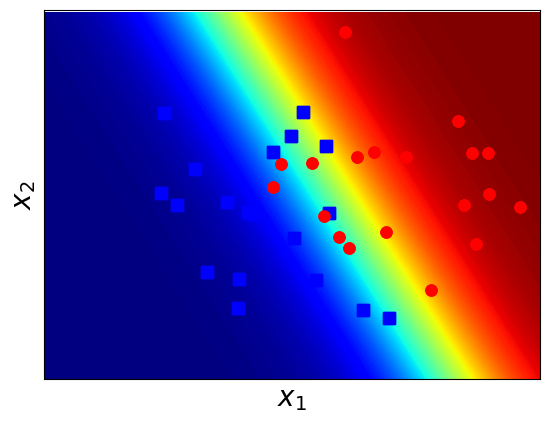

In [12]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize=8, alpha=1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize=8, alpha=1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# Hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

# Save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi=300)

def sigmoid(s):
    return 1 / (1 + np.exp(-s))  # Calculate sigmoid function

def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20

    while count < max_count:
        # Mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            # Stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    w.append(w_new)
                    return w
            w.append(w_new)
    return w

X = np.concatenate((X1, X2), axis=0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis=1).T

# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis=0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000)

# Print out
print(w[-1])

# Make data
x1m = np.arange(-1, 6, 0.025)
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025)
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m)


w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]


zm = sigmoid(w0 + w1*x1m + w2*x2m)


CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')

# Finally, plot the data and take a look
plt.plot(X[1, :N], X[2, :N], 'bs', markersize=8, alpha=1)
plt.plot(X[1, N:], X[2, N:], 'ro', markersize=8, alpha=1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi=300)
plt.show()


Accuracy: 0.825
Precision: 0.8823529411764706


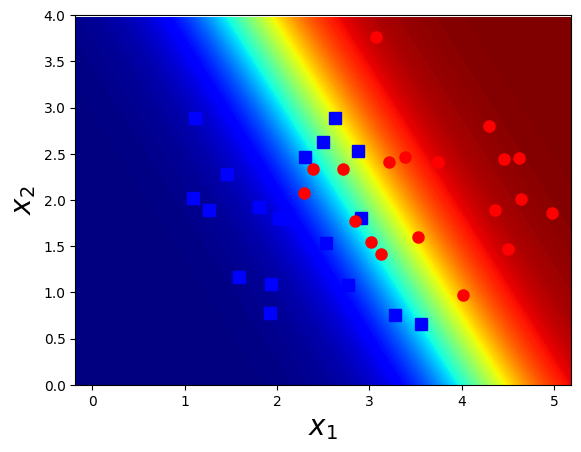

In [13]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Generate data
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[0.7, 0], [0, 0.7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

# Concatenate data and add bias term
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(N), np.ones(N)))

# Create and fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Calculate predictions
predictions = model.predict(X)

# Calculate accuracy and precision
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)

# Print accuracy and precision
print("Accuracy:", accuracy)
print("Precision:", precision)
# Plot data points

plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'bs', markersize=8, alpha=1)
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'ro', markersize=8, alpha=1)

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.025), np.arange(x2_min, x2_max, 0.025))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')

# Plot settings
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)

# Save the figure
plt.savefig('logistic_sklearn.png', bbox_inches='tight', dpi=300)
plt.show()


# BT2


In [14]:
##Numerize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
# change to your data's path
data=pd.read_csv("banking.csv")
data.head()
#data['housing'] = data['housing'].map({'no': 0, 'yes': 1})
dict_month = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
             'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
data['month'] = data['month'].map(dict_month)


# loan, default, housing
data['default'].replace({'no': 0, 'yes': 1, 'unknown': -1}, inplace=True)
data['loan'].replace({'no': 0, 'yes': 1, 'unknown': -1}, inplace=True)
data['housing'].replace({'no': 0, 'yes': 1, 'unknown': -1}, inplace=True)
#contact
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data= pd.concat([data, job_dummies], axis=1)
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
#contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)
dict_day = {'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6,
             'sat' : 7}


data['day_of_week'] = data['day_of_week'].map(dict_day)

data.to_csv("numerized_data.csv", index=False)







In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# Load numerized data
data = pd.read_csv("numerized_data.csv")

# Separate features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
naive_bayes_model = GaussianNB()

# Measure time and performance for Logistic Regression
start_time_logistic = time.time()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
end_time_logistic = time.time()

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Measure time and performance for Naive Bayes
start_time_nb = time.time()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)
end_time_nb = time.time()

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print results
print("Logistic Regression - Time:", end_time_logistic - start_time_logistic)
print("Logistic Regression - Accuracy:", accuracy_logistic)
print("Logistic Regression - Precision:", precision_logistic)
print("Logistic Regression - Recall:", recall_logistic)
print("Logistic Regression - F1-score:", f1_logistic)

print("\nNaive Bayes - Time:", end_time_nb - start_time_nb)
print("Naive Bayes - Accuracy:", accuracy_nb)
print("Naive Bayes - Precision:", precision_nb)
print("Naive Bayes - Recall:", recall_nb)
print("Naive Bayes - F1-score:", f1_nb)


Logistic Regression - Time: 2.265913248062134
Logistic Regression - Accuracy: 0.9051954357853847
Logistic Regression - Precision: 0.6391752577319587
Logistic Regression - Recall: 0.3944856839872747
Logistic Regression - F1-score: 0.4878688524590164

Naive Bayes - Time: 0.05157732963562012
Naive Bayes - Accuracy: 0.8345472201990775
Naive Bayes - Precision: 0.366412213740458
Naive Bayes - Recall: 0.6108165429480382
Naive Bayes - F1-score: 0.458051689860835


# BT3

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv("framingham.csv")
data.head()
data.isnull().sum()
data=data.dropna(how="any", axis=0)

print(data.columns)

X = data[['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
           'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

y = data['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred_prob = model.predict(X_test)

# Threshold the probabilities to get binary predictions
threshold = 0.5  # You can adjust this threshold
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
Accuracy: 0.8413855970829535
Precision: 0.5
Recall: 0.040229885057471264
F1-score: 0.07446808510638298


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the data
data = pd.read_csv("framingham.csv")
data = data.dropna(how="any", axis=0)

# Select features and target variable
X = data[['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
           'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data['TenYearCHD']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Print the evaluation
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8441203281677302
Precision: 0.5555555555555556
Recall: 0.08620689655172414
